### Import libraries. begin, let's import the necessary libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [67]:
import warnings
warnings.filterwarnings('ignore')

In [115]:
!pip install lightgbm


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 435.7 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.4 MB 653.6 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.4 MB 1.3 MB/s eta 0:00:01
   ----- ---------------------------------- 0.2/1.4 MB 1.3 MB/s eta 0:00:01
   ------ --------------------------------- 0.2/1.4 MB 915.1 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 944.1 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.4 MB 893.0 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.4 MB 893.0 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.4 MB 893.0 kB/s eta 0:00:02
   --------- ------------------------------ 0.3/1.4 MB 675.6 kB/s eta 0:00:02
   ---------- ----------------------------- 0.4/1.4 MB 716.8 kB/s eta 0:00:02
   -----

In [116]:
pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 744.7 kB/s eta 0:02:48
   ---------------------------------------- 0.2/124.9 MB 978.3 kB/s eta 0:02:08
   ---------------------------------------- 0.2/124.9 MB 1.0 MB/s eta 0:02:00
   ---------------------------------------- 0.2/124.9 MB 1.0 MB/s eta 0:02:00
   ---------------------------------------- 0.2/124.9 MB 1.0 MB/s eta 0:02:00
   ---------------------------------------- 0.2/124.9 MB 1.0 MB/s eta 0:02:00
   ---------------------------------------- 0.2/124.9 MB 1.0 MB/s eta 0:02:00
   ---------------------------------------- 0.2/124.9 MB 478.0 kB/s eta 0:04:21
   ---------------------------------------- 0.2/124.9 MB 478.0 kB/s eta 0:04:21
   ---------------------------------------- 0.2/124.9 MB 478.0 kB/s eta 0:04:

### Import the dataset

In [68]:
df = pd.read_csv('Ad Click Data.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0


In [69]:
print('Number of examples and features:', df.shape)
print('features in the dataset:', df.columns.tolist())

Number of examples and features: (1000, 10)
features in the dataset: ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country', 'Timestamp', 'Clicked on Ad']


We have total 1000 training examples and 10 features.

### EDA: Exploratory Data Analysis

In [70]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      999 non-null    object 
 6   Male                      997 non-null    float64
 7   Country                   991 non-null    object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.3+ KB


In [71]:
# Let's look at stats of the non-object features
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,987.000000,1000.000000,987.000000,989.000000,997.000000,1000.00000
mean,64.929524,36.009000,54980.667234,179.863620,0.480441,0.50000
std,15.844699,8.785562,13439.998510,43.870142,0.499868,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.270000,29.000000,46947.570000,138.710000,0.000000,0.00000
50%,68.110000,35.000000,57009.760000,182.650000,0.000000,0.50000
75%,78.460000,42.000000,65479.350000,218.790000,1.000000,1.00000
max,91.430000,61.000000,79484.800000,267.010000,1.000000,1.00000


### Numerical features

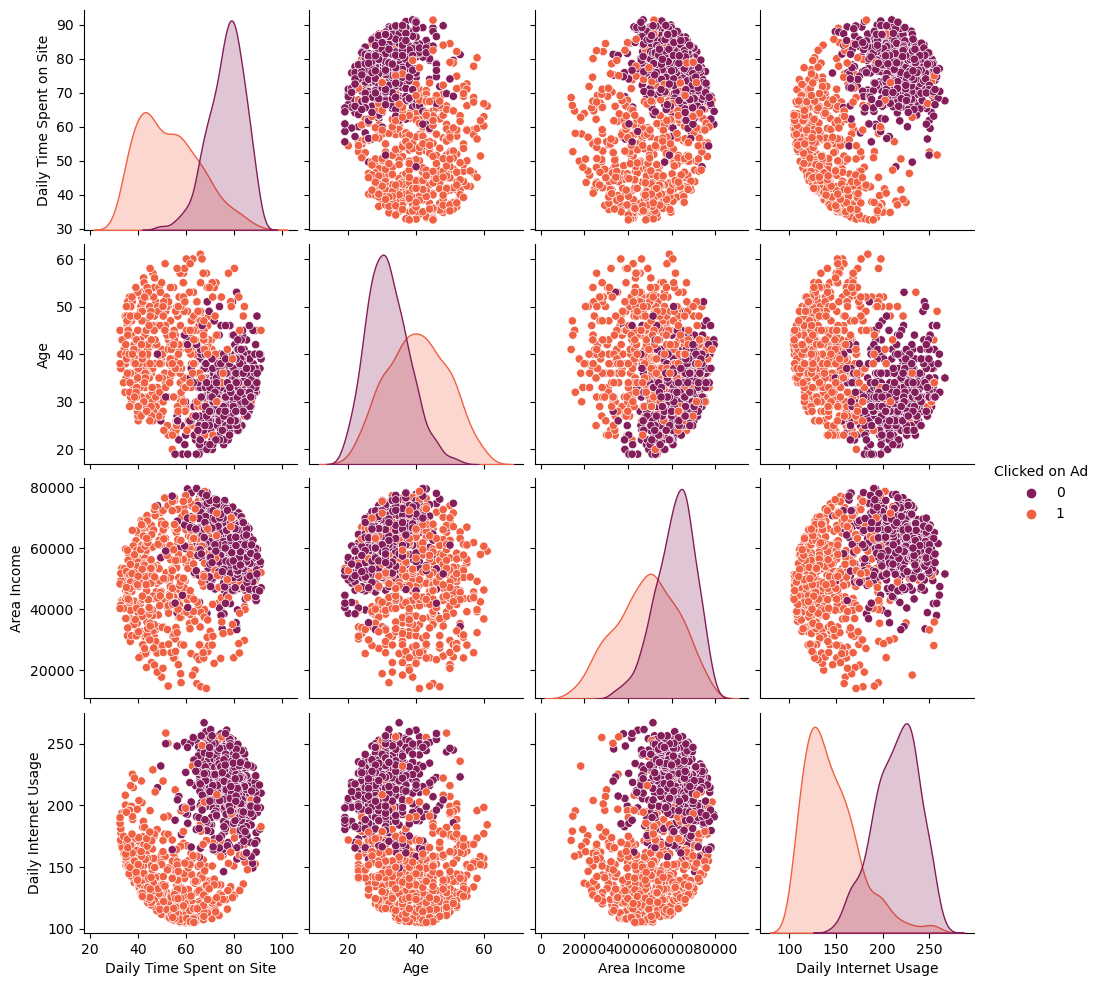

In [72]:
sns.pairplot(df, hue='Clicked on Ad', vars=['Daily Time Spent on Site', 
                                            'Age',
                                           'Area Income',
                                           'Daily Internet Usage'], palette='rocket')

Pairplot represents the relationshi between the target feature and the explanatory features.

We also see that users with higher area income who spends more time on the site does not click on ad also relatively younger users with higher income do not click on ads. So this group of users could be the target users.

Again the users with higher area income who more likely to spend longer time on the site do not click on ad.

<Axes: xlabel='Age', ylabel='count'>

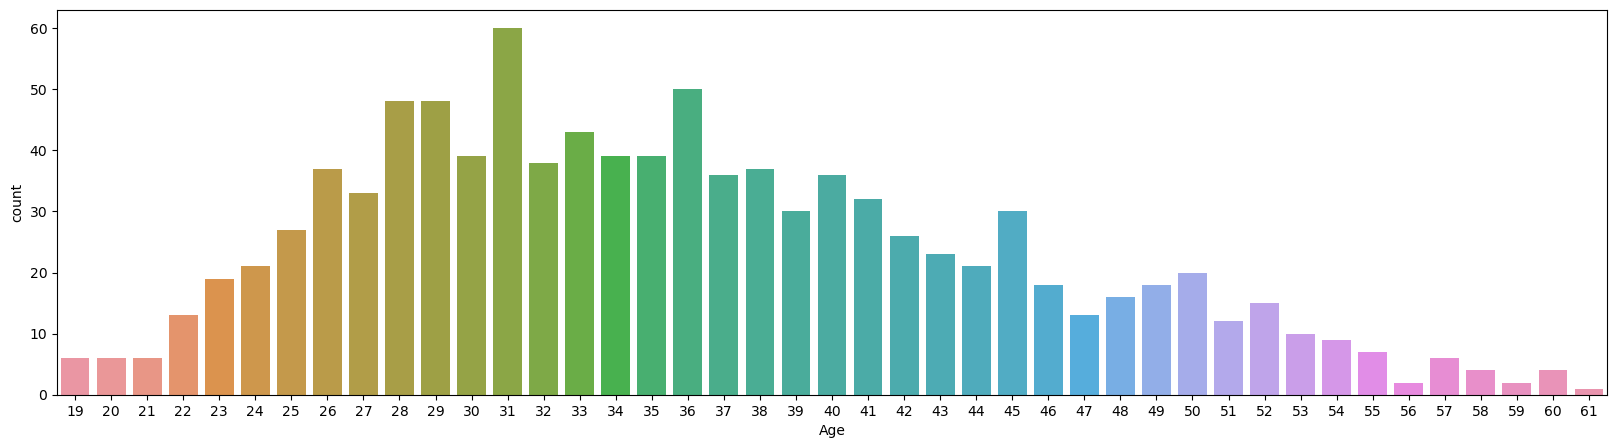

In [73]:
#get the info of the number of ad clicked
fig = plt.figure(figsize = (20, 5))
sns.countplot(x ='Age', data = df)

We see mjority of the users are in the age range 25 to 45, which could be our target age group for ad recommnedation. We need to check if this age group is actually clicking on the ad or no.

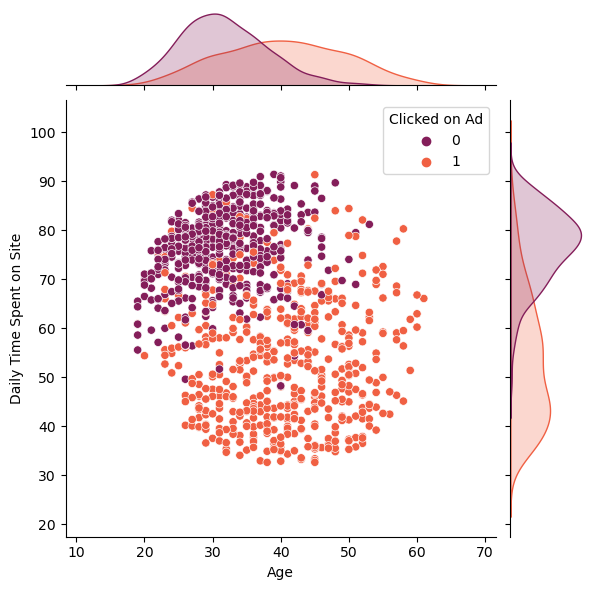

In [74]:
sns.jointplot(x='Age',y='Daily Time Spent on Site', data=df, hue="Clicked on Ad", palette='rocket')


<Axes: xlabel='Age', ylabel='Daily Time Spent on Site'>

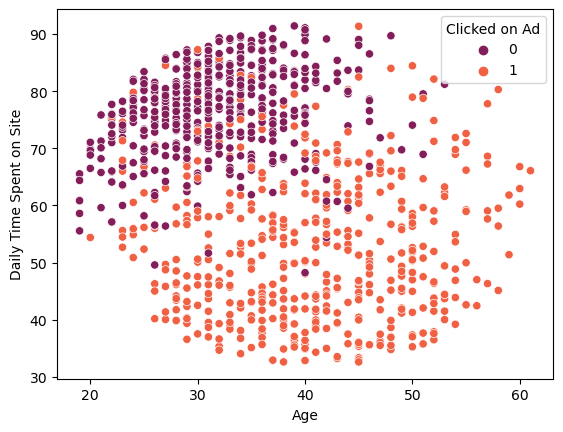

In [75]:
sns.scatterplot(x='Age',y='Daily Time Spent on Site', 
                hue='Clicked on Ad', data=df, palette='rocket')


This plot tells us that the younger users spceially from age 20 to 40, spent most time on the site. So this group of users could be good target group for the ad campaign. We can also say that if a product is targetting a population whose age does not fall into the range 19 to 61, this site is not right platform to advertize the product.

This plot tells us that all the users who spent less time on the site tend to click on ad. On the other hand, among the 20 to 55 years user group who spent most time on the site apperently don't click on the ad, whereas the same user group who spents less time clicks on ad.

<Axes: xlabel='Area Income', ylabel='Daily Time Spent on Site'>

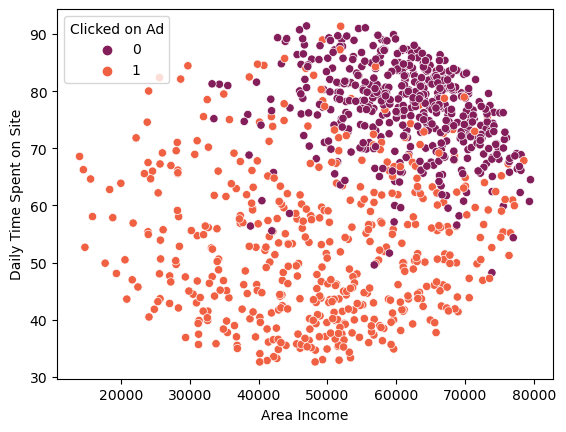

In [76]:
sns.scatterplot(x='Area Income',y='Daily Time Spent on Site', 
                hue='Clicked on Ad', data=df, palette='rocket')

This plot tells us that all the users who spent less time on the site and has more area income tend to click on ad. On the other hand, user group with higher area income who spend more time on the site does not seem to click on the ad. Which is interesting, it could be the add is not personalized to this group of users.

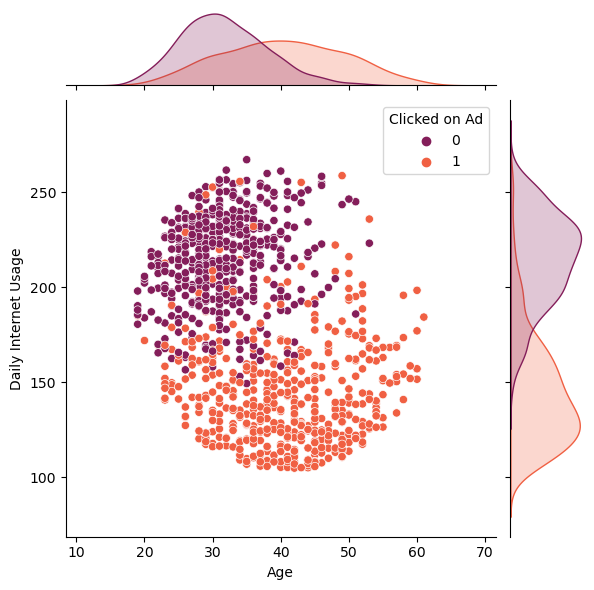

In [77]:
sns.jointplot(x='Age',y='Daily Internet Usage', data=df, hue="Clicked on Ad", palette='rocket')


Users who spen less time on the internet tends to click on add regardless the age range. On the other hand, users younger than 45 seems to spend more time on the internet but avoid to click on ad.



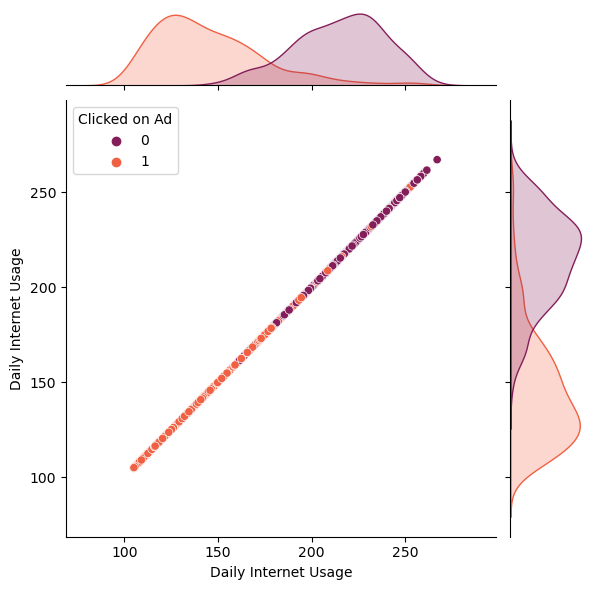

In [78]:
sns.jointplot(x='Daily Internet Usage',y='Daily Internet Usage', data=df, hue="Clicked on Ad", palette='rocket')


We see daily internet use and daily time spent on the site is linearly correlated, which make sense.



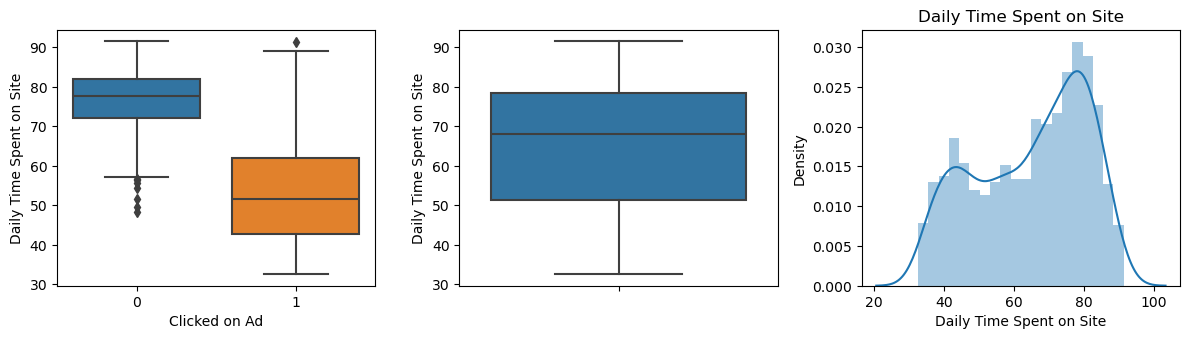

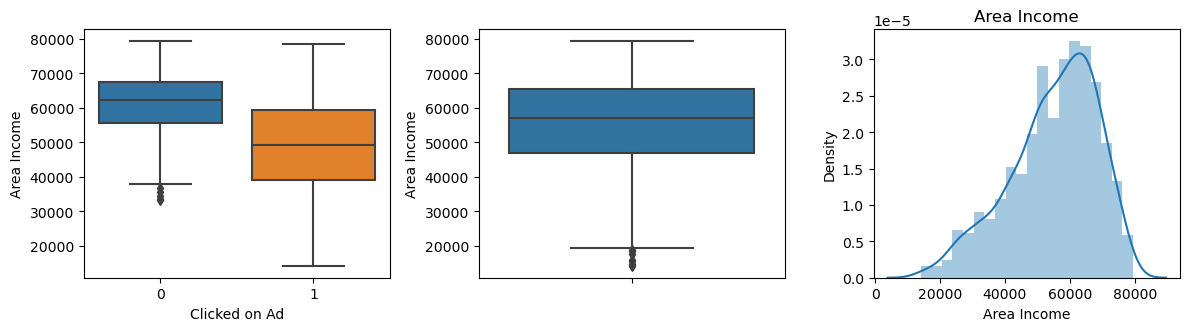

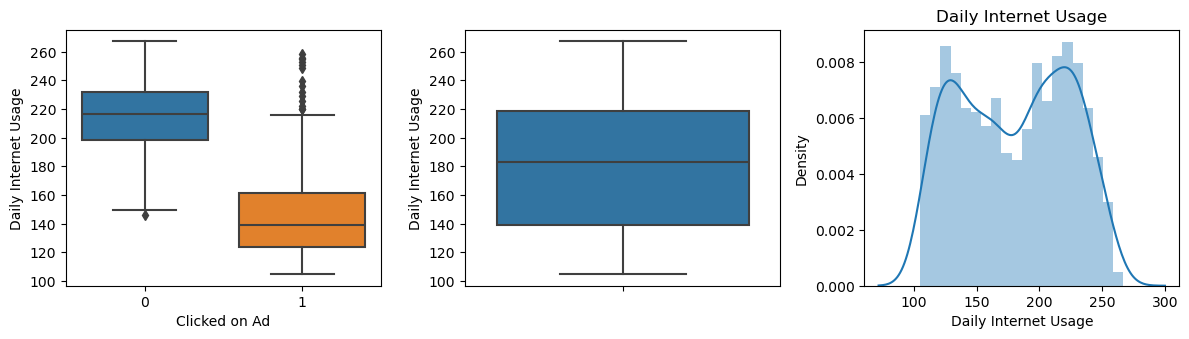

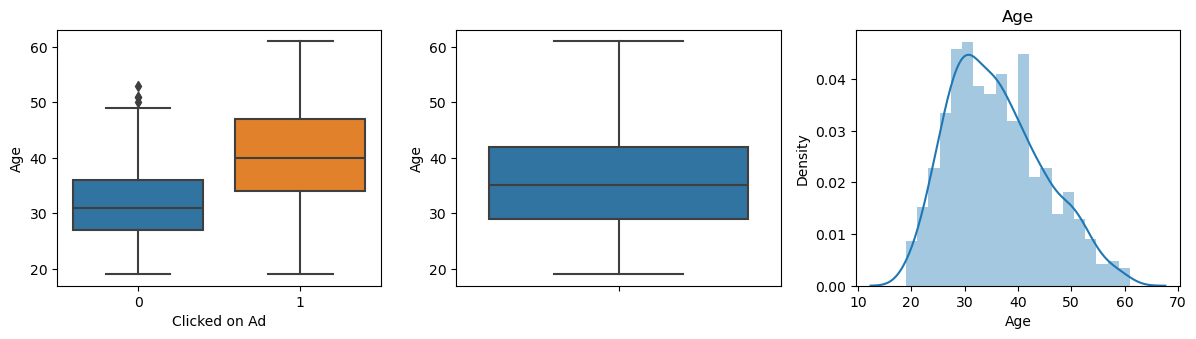

In [79]:

    
plots = ['Daily Time Spent on Site',
         'Area Income','Daily Internet Usage', 'Age']
for i in plots:
    plt.figure(figsize=(12,6))
    
    plt.subplot(2,3,1)
    sns.boxplot(data=df,x = 'Clicked on Ad', y=i)
    
    plt.subplot(2,3,2)
    sns.boxplot(data=df,y=i)
    
    plt.subplot(2,3,3)
    sns.distplot(df[i],bins=20)
    plt.tight_layout()
    plt.title(i)
    plt.show()

In [80]:
df_final = df.select_dtypes(include=np.number)
df_final.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0.0,0
1,80.23,31,68441.85,193.77,1.0,0
2,69.47,26,59785.94,236.50,0.0,0
3,74.15,29,54806.18,245.89,1.0,0
4,68.37,35,73889.99,225.58,0.0,0


In [81]:
df_final.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331424,0.308266,0.518294,-0.020260,-0.746514
Age,-0.331424,1.000000,-0.179343,-0.370481,-0.020530,0.492531
Area Income,0.308266,-0.179343,1.000000,0.338080,0.004326,-0.477576
Daily Internet Usage,0.518294,-0.370481,0.338080,1.000000,0.028034,-0.789693
Male,-0.020260,-0.020530,0.004326,0.028034,1.000000,-0.035093
Clicked on Ad,-0.746514,0.492531,-0.477576,-0.789693,-0.035093,1.000000


<Axes: >

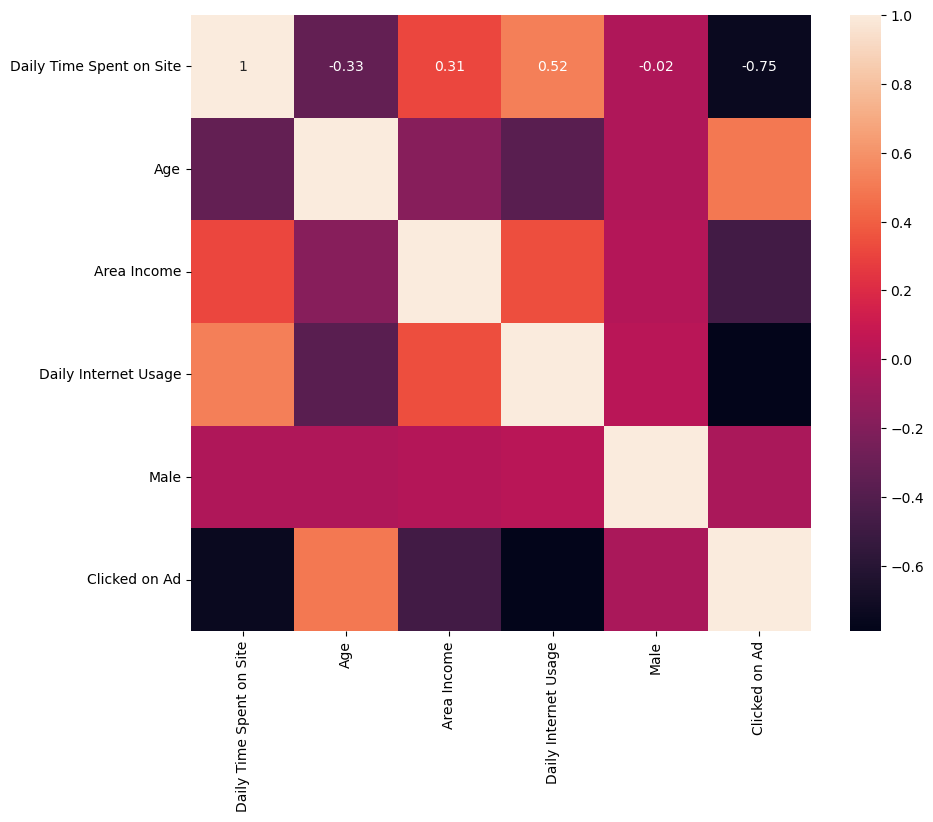

In [82]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(df_final.corr(), annot=True)

Here we see Daily Time Spent on Site, Age, Area Income, Daily Intenert Usage are highly correlate with the target variable. Which indicates they are important features and will be useful for ML model.

We also notice that Daily Time spent on site has strong correlation with other with daily intenet usage, Age, Area Inocme and so does daily internet usage

### Categorical Features

Male
0.0    518
1.0    479
Name: count, dtype: int64


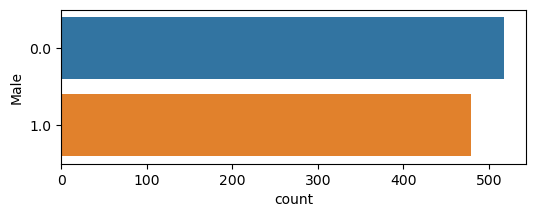

In [83]:
fig = plt.figure(figsize = (6,2))
sns.countplot(data = df , y = 'Male')
print(df['Male'].value_counts())

Clicked on Ad
0    500
1    500
Name: count, dtype: int64


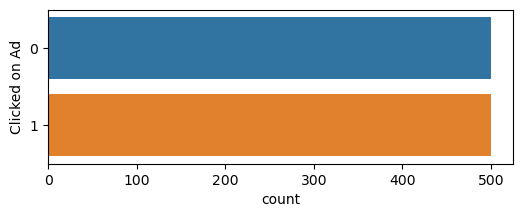

In [84]:
#get the info of the number of ad clicked
fig = plt.figure(figsize = (6,2))
sns.countplot(y ='Clicked on Ad', data = df)
print(df['Clicked on Ad'].value_counts())

Data seems very balanced interms of Male feature and the target feature.



In [85]:
#get the info of the Ad Topic Line
print(df['Ad Topic Line'].value_counts())

Ad Topic Line
Cloned 5thgeneration orchestration              1
Synchronized multi-tasking ability              1
Customer-focused impactful success              1
Open-source optimizing parallelism              1
Organic logistical adapter                      1
                                               ..
Enhanced zero tolerance Graphic Interface       1
De-engineered tertiary secured line             1
Reverse-engineered well-modulated capability    1
Integrated coherent pricing structure           1
Virtual 5thgeneration emulation                 1
Name: count, Length: 1000, dtype: int64


In [86]:
object_features = ['Ad Topic Line', 'City', 'Country', 'Timestamp']
df[object_features].describe(include=['O'])

,Ad Topic Line,City,Country,Timestamp
count,1000,999,991,1000
unique,1000,968,237,997
top,Cloned 5thgeneration orchestration,Lisamouth,France,5/26/2016 15:40
freq,1,3,9,2


From above cell we see that all ad topic lines are unique, which indicates this features has less chace of carying any useful information for the prediction model. There are 969 diffirent cities out of 237 countries. These indicates that the users are not from a spcecific demograhic but from all over the world. Even though we see France repeates 9 times, meaning highest number of visitors are from France but still it just 9 of them.

In [87]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Weekday'] = df['Timestamp'].dt.dayofweek
df['Hour'] = df['Timestamp'].dt.hour
df = df.drop(['Timestamp'], axis=1)

df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Day,Weekday,Hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,0,3,27,6,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,0,4,4,0,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,0,3,13,6,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,0,1,10,6,2
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,0,6,3,4,3


In [88]:
df['Month'].unique()


array([3, 4, 1, 6, 5, 7, 2])

In [89]:
df['Month'][df['Clicked on Ad'] == 1].value_counts().sort_index()


Month
1    69
2    83
3    74
4    74
5    79
6    71
7    50
Name: count, dtype: int64

<Axes: xlabel='Month'>

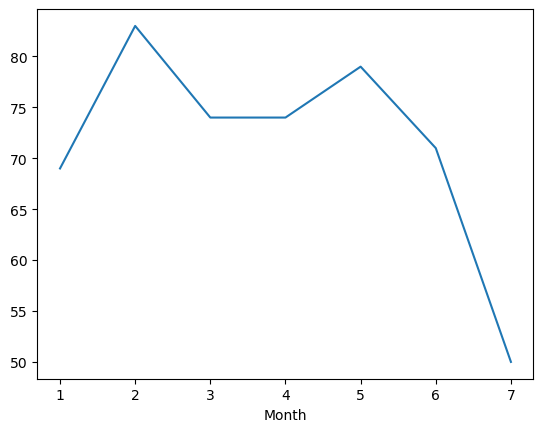

In [90]:
df['Month'][df['Clicked on Ad'] == 1].value_counts().sort_index().plot()


<Axes: xlabel='Day'>

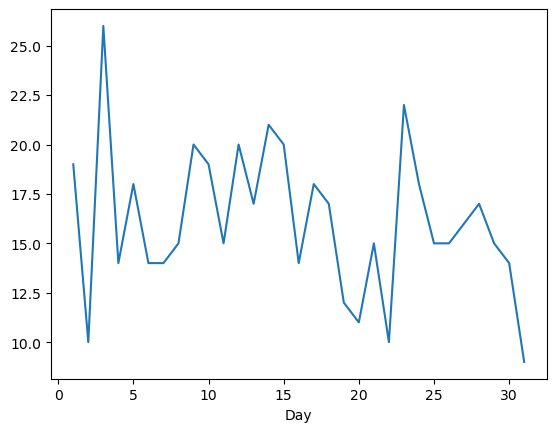

In [91]:
df['Day'][df['Clicked on Ad'] == 1].value_counts().sort_index().plot()


In [92]:
df['Weekday'][df['Clicked on Ad'] == 1].value_counts().sort_index()


Weekday
0    72
1    55
2    79
3    79
4    71
5    64
6    80
Name: count, dtype: int64

<Axes: xlabel='Weekday'>

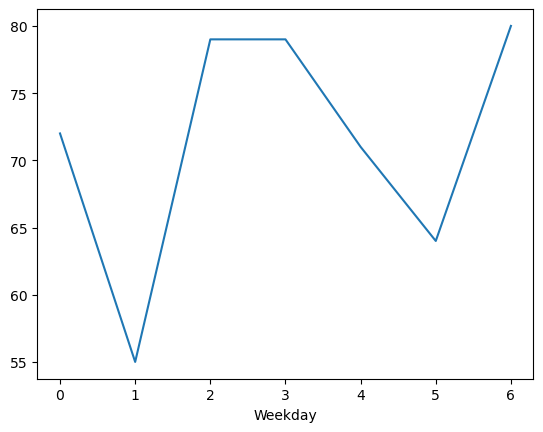

In [93]:
df['Weekday'][df['Clicked on Ad'] == 1].value_counts().sort_index().plot()


<Axes: xlabel='Hour'>

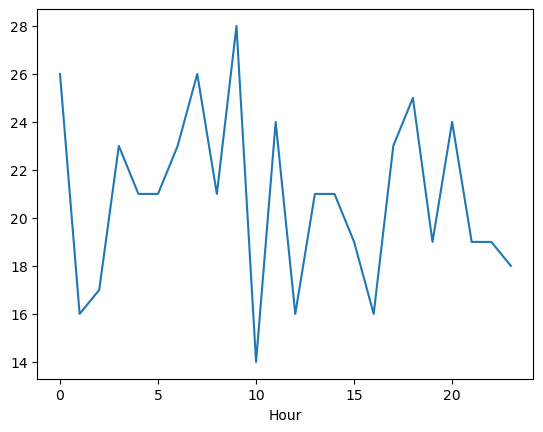

In [94]:
df['Hour'][df['Clicked on Ad'] == 1].value_counts().sort_index().plot()


 ## Logistic Regression

#### Missing Values

In [95]:
missing = df.isnull().sum()
missing_precent = 100*missing/len(df)
missing_table = pd.concat([missing, missing_precent], axis=1)
missing_table.columns = ['missing_value', '% of missing_value']
missing_table = missing_table.loc[missing_table['missing_value'] != 0].sort_values('missing_value')
print('The dataset has total {} columns \nThere are {} columns that have missing values\n\n'.format(df.shape[1], missing_table.shape[0]))
missing_table.head()

The dataset has total 13 columns 
There are 6 columns that have missing values




,missing_value,% of missing_value
City,1,0.1
Male,3,0.3
Country,9,0.9
Daily Internet Usage,11,1.1
Daily Time Spent on Site,13,1.3


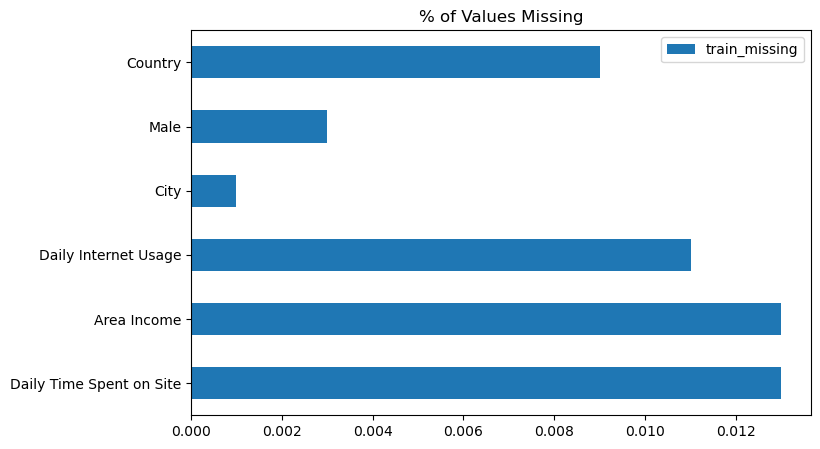

In [96]:
ncounts = pd.DataFrame([df.isna().mean()]).T
ncounts = ncounts.rename(columns={0: "train_missing", 1: "test_missing"})

ncounts.query("train_missing > 0").plot(
    kind="barh", figsize=(8, 5), title="% of Values Missing"
)
plt.show()

In [97]:
df.select_dtypes(exclude='object').shape


(1000, 10)

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#filling null values with the median values
imputer = SimpleImputer()
#using features with only neumeric values 
#since we already decided to drop all the object features in this dataset
df_numeric = df.select_dtypes(exclude='object')
imputed_df = imputer.fit_transform(df_numeric)

# since imputation converts the data frame into a numpy array, 
# let's convert it into a dataframe back
df_train = pd.DataFrame(imputed_df)

# since imputation removes column names, let's put them back
df_train.columns = df.select_dtypes(exclude='object').columns
train_features = ['Daily Time Spent on Site', 'Age', 'Area Income',
                   'Daily Internet Usage', 'Male', 
                   'Month', 'Day', 'Weekday', 'Hour']

numeric_features = ['Daily Time Spent on Site', 'Age', 'Area Income',
                   'Daily Internet Usage']

scaler = StandardScaler()
df_train[numeric_features] = scaler.fit_transform(df_train[numeric_features])

X = df_train[train_features]
y = df_train['Clicked on Ad']

x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state=101)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(750, 9) (750,)
(250, 9) (250,)


In [99]:
x_train.head()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Month,Day,Weekday,Hour
968,-1.261617,0.226735,-1.471004,-1.251971,0.0,3.0,27.0,6.0,8.0
205,-0.426451,-0.798185,-1.321443,-1.352187,0.0,2.0,11.0,3.0,2.0
231,-1.154202,-0.456545,-1.789935,-0.996732,1.0,3.0,23.0,2.0,6.0
147,0.380749,0.568375,-0.373535,-1.644347,1.0,5.0,5.0,3.0,7.0
531,-0.730263,0.682255,-0.904627,-1.644118,1.0,4.0,4.0,0.0,22.0


In [100]:
x_train.isnull().sum().sum()


0

In [101]:
LR = LogisticRegression(solver='lbfgs')
LR.fit(x_train, y_train)
predictions_LR = LR.predict(x_test)

print('\nLogistic regression accuracy:', accuracy_score(predictions_LR, y_test))

cf_matrix = confusion_matrix(predictions_LR, y_test)
print('\nConfusion Matrix:')
print(cf_matrix)

print(classification_report(y_test, predictions_LR))


Logistic regression accuracy: 0.964

Confusion Matrix:
[[129   4]
 [  5 112]]
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       134
         1.0       0.96      0.97      0.96       116

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



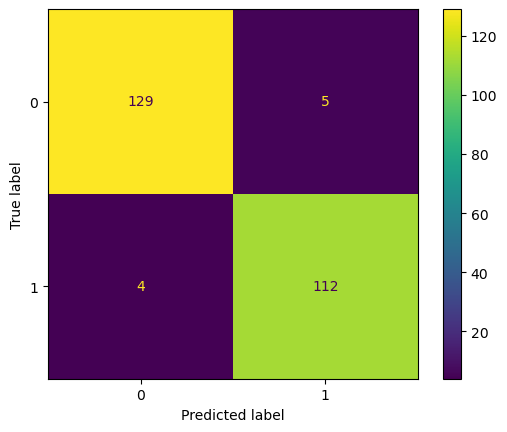

In [102]:
from sklearn import metrics



cf_matrix = metrics.confusion_matrix(y_test, predictions_LR)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

     Confusion Matrix: The users that are predicted to click on commercials and the actually clicked were 112, the people who were predicted not to click on the commercials and actually did not click on them were 129.

The people who were predicted to click on commercial and actually did not click on them are 5, and the users who were not predicted to click on the commercials and actually clicked on them are 2.

We have only a few mislabelled points which is not bad from the given size of the dataset.

Classification Report:

From the report obtained, the precision & recall are 0.96 which depicts the predicted values are 98% accurate. Hence the probability that the user can click on the commercial is 0.96 which is a great precision value to get a good model.

## Decision Tree Classifier

In [103]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)
predictions_DT = model2.predict(x_test)

print('\nDecisionTreeClassifier accuracy:', accuracy_score(predictions_DT, y_test))
cf_matrix = confusion_matrix(predictions_DT, y_test)
print('\nConfusion Matrix:')
print(cf_matrix)


DecisionTreeClassifier accuracy: 0.944

Confusion Matrix:
[[127   7]
 [  7 109]]


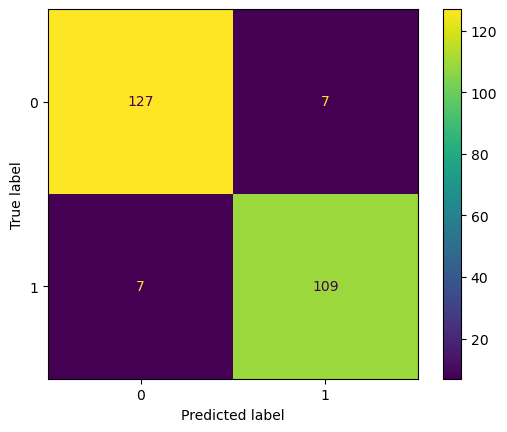

In [104]:
from sklearn import metrics



cf_matrix = metrics.confusion_matrix(y_test, predictions_DT)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

## Naive Bayes

In [105]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(x_train, y_train)

GaussianNB()

In [106]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred2 = model.predict(x_test)

accuray = accuracy_score(y_pred2, y_test)
f1 = f1_score(y_pred2, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.968
F1 Score: 0.968


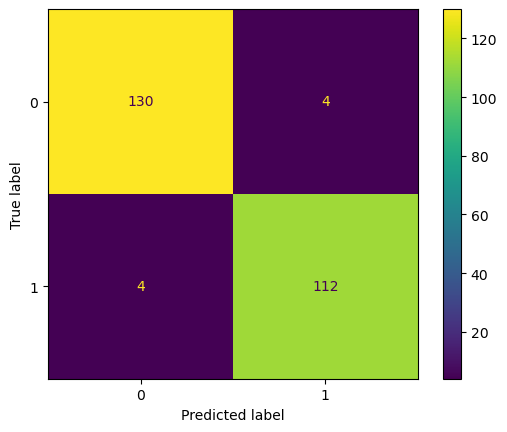

In [107]:
from sklearn import metrics



cf_matrix = metrics.confusion_matrix(y_test, y_pred2)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       134
         1.0       0.97      0.97      0.97       116

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



## KNeighborsClassifier

In [109]:
from sklearn.neighbors import KNeighborsClassifier

k_values = [i for i in range (1,31)]
scores = []



for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    scores.append(accuracy_score(y_test,knn.predict(x_test)))

<Axes: >

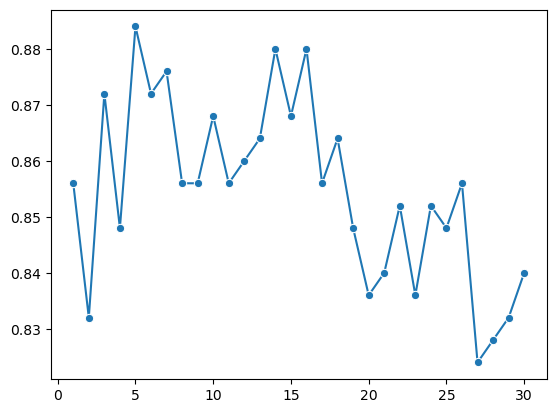

In [110]:
sns.lineplot(x = range(1,31),y = scores, marker = 'o')

In [111]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [112]:
y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.884


## XGBoost Classifier

In [117]:
from xgboost import XGBClassifier

model3 = XGBClassifier()
model3.fit(x_train, y_train)
predictions_XGB = model3.predict(x_test)

print('\nXGBClassifier accuracy:', accuracy_score(predictions_XGB, y_test))
cf_matrix = confusion_matrix(predictions_DT, y_test)
print('\nConfusion Matrix:')
print(cf_matrix)


XGBClassifier accuracy: 0.96

Confusion Matrix:
[[127   7]
 [  7 109]]


### Feature Importance

In [121]:
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np

feature_importances = np.zeros(X.shape[1])

# Create the model with several hyperparameters
model = lgb.LGBMClassifier(objective='binary',
                           boosting_type = 'goss',
                           n_estimators = 10000,
                           class_weight = 'balanced')

# Fit the model twice to avoid overfitting
for i in range(2):

    # Split into training and validation set
    train_features, valid_features, train_y, valid_y = train_test_split(X,
                                                                        y,
                                                                        test_size = 0.25,
                                                                        random_state = i)

    # Define the early stopping callback
    callback = lgb.early_stopping(stopping_rounds=100, verbose=200)

    # Train using early stopping
    model.fit(train_features, train_y, eval_set = [(valid_features, valid_y)],
              eval_metric = 'auc', callbacks=[callback])
    predictions_LGB = model.predict(valid_features)

    print('\nLGB accuracy:', accuracy_score(predictions_LGB, valid_y))
    print('\nConfusion Matrix:')
    print(confusion_matrix(predictions_LGB, valid_y))

    # Record the feature importances
    feature_importances += model.feature_importances_

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 386, number of negative: 364
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000479 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 861
[LightGBM] [Info] Number of data points in the train set: 750, number of used features: 9
[LightGBM] [Info] Using GOSS
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosti

In [123]:
# Make sure to average feature importances! 
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(X.columns),
                                    'importance': feature_importances}
                                  ).sort_values('importance', ascending = False)

feature_importances.head(10)

,feature,importance
0,Daily Time Spent on Site,117.0
2,Area Income,101.5
3,Daily Internet Usage,91.0
1,Age,62.0
6,Day,31.0
8,Hour,21.5
7,Weekday,11.5
5,Month,9.0
4,Male,1.0


In [124]:
# Find the features with zero importance
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail()

There are 0 features with 0.0 importance


,feature,importance
6,Day,31.0
8,Hour,21.5
7,Weekday,11.5
5,Month,9.0
4,Male,1.0


In [125]:
def plot_feature_importances(df, threshold = 0.9):
    """
    Plots 10 most important features and the cumulative importance of features.
    Prints the number of features needed to reach threshold cumulative importance.
    
    Parameters
    --------
    df : dataframe
        Dataframe of feature importances. Columns must be feature and importance
    threshold : float, default = 0.9
        Threshold for prining information about cumulative importances
        
    Return
    --------
    df : dataframe
        Dataframe ordered by feature importances with a normalized column (sums to 1)
        and a cumulative importance column
    
    """
    
    plt.rcParams['font.size'] = 18
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    plt.show();
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))
    
    return df


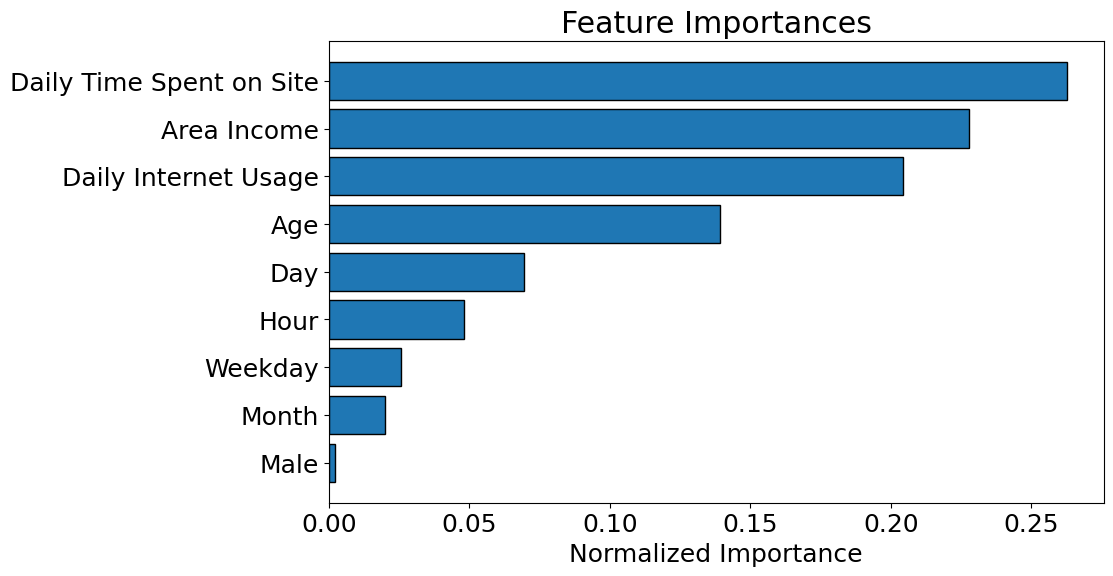

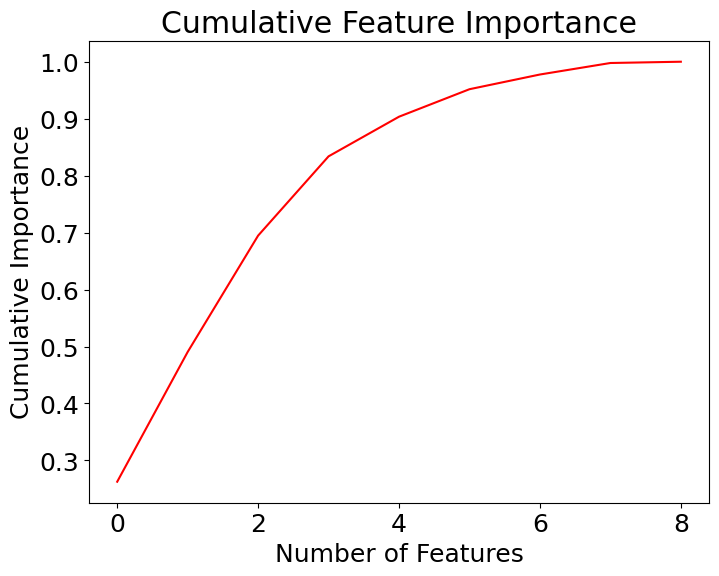

8 features required for 0.99 of cumulative importance


In [126]:
norm_feature_importances = plot_feature_importances(feature_importances,
                                                   threshold = 0.99)